In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def GARCH_11(a0, a1, b1, n): #ARCH 포함
    L1, L2 = [], [] #sig^2_t = a0+a1Y_{t-1}^2+b1sig_{t-1}^2
    Y0, sig0 = 0,1
    for t in range(n):
        sig_t = (a0+a1*Y0**2+b1*sig0**2)**0.5
        et = np.random.normal(0, 1)
        Yt = sig_t*et
        L1.append(Yt)
        L2.append(sig_t)
        sig0 = sig_t
        Y0 = Yt
    return L1, L2

In [5]:
A1, AV1 = GARCH_11(1, 0.6, 0, 400)

In [6]:
def Gr(D, T): # T-title
    plt.plot(D)
    plt.title(T)
    plt.show()

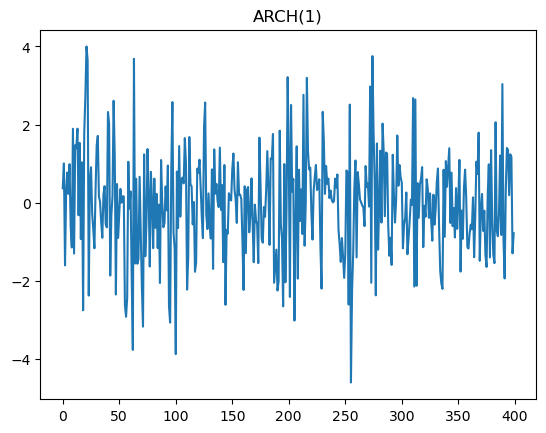

In [7]:
Gr(A1, 'ARCH(1)')

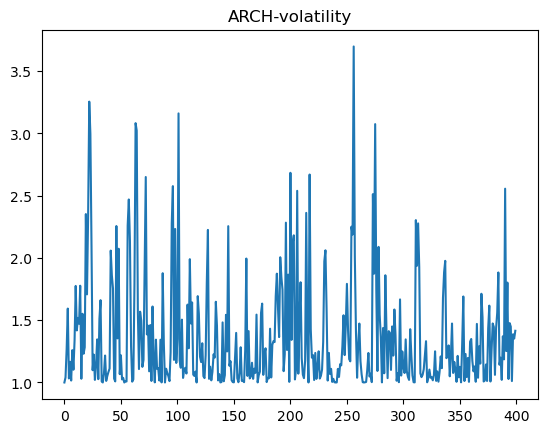

In [8]:
Gr(AV1, 'ARCH-volatility')

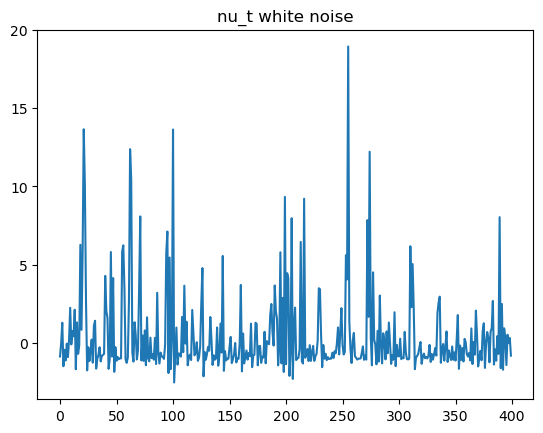

In [9]:
Gr(np.array(A1)**2-np.array(AV1), 'nu_t white noise')

In [13]:
GA1, GAV1 = GARCH_11(1, 0.6, 0.3, 400) #stationary GARCH

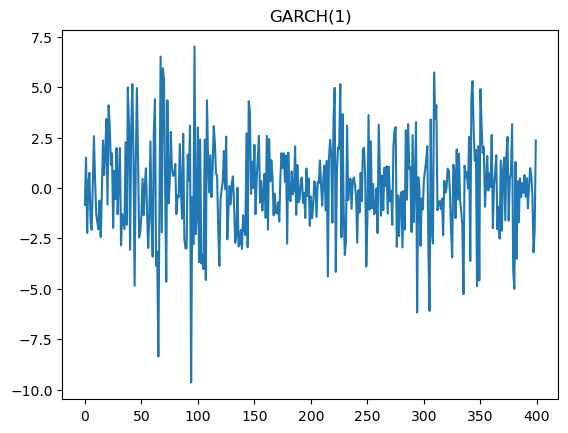

In [14]:
Gr(GA1, 'GARCH(1)')

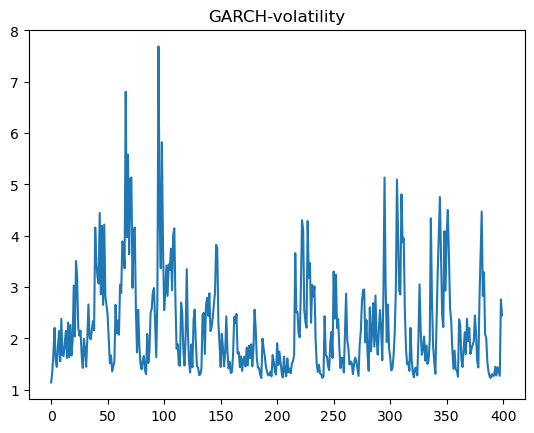

In [15]:
Gr(GAV1, 'GARCH-volatility')

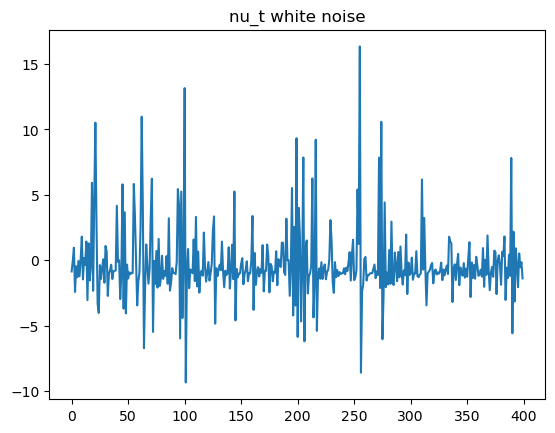

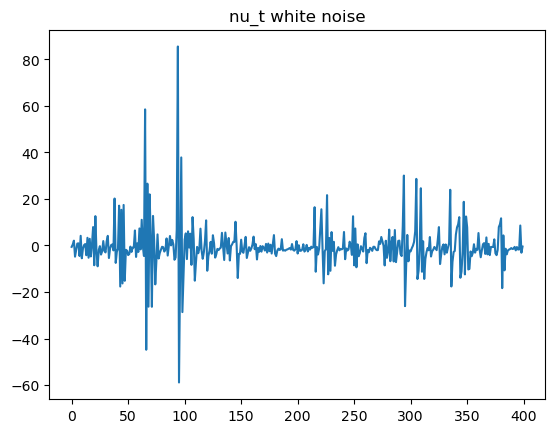

In [16]:
Gr(np.array(A1)**2-np.array(AV1)**2, 'nu_t white noise')
Gr(np.array(GA1)**2-np.array(GAV1)**2, 'nu_t white noise')

In [17]:
GA2, GAV2 = GARCH_11(1, 0.6, 0.4, 400) # integrated GACRCH

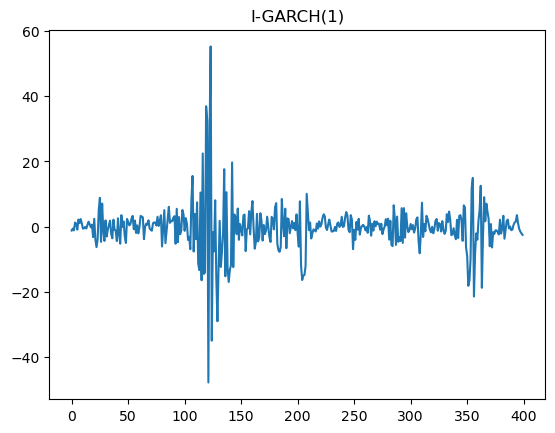

In [18]:
Gr(GA2, 'I-GARCH(1)')

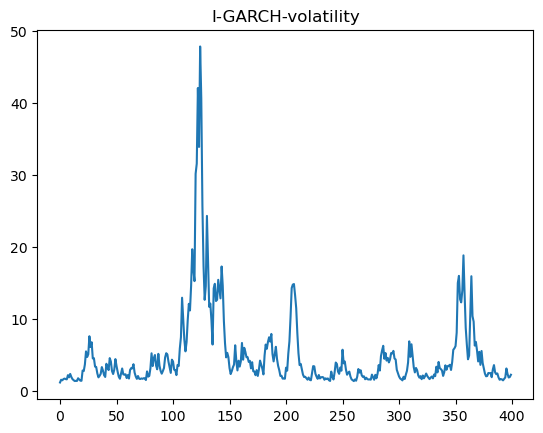

In [19]:
Gr(GAV2, 'I-GARCH-volatility')

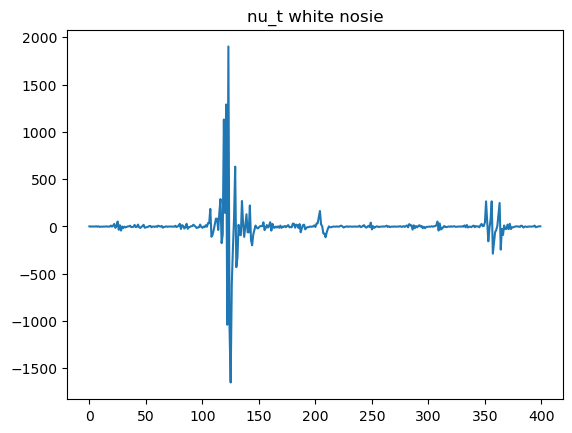

In [20]:
Gr(np.array(GA2)**2-np.array(GAV2)**2, 'nu_t white nosie')

In [26]:
#!pip install arch

In [24]:
from arch import arch_model

In [29]:
garch11 = arch_model(GA1, p=1, q=1)
result = garch11.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1658.5645237200638
Iteration:      2,   Func. Count:     13,   Neg. LLF: 718120.769601775
Iteration:      3,   Func. Count:     19,   Neg. LLF: 884.5661484520926
Iteration:      4,   Func. Count:     25,   Neg. LLF: 901.5239135388886
Iteration:      5,   Func. Count:     31,   Neg. LLF: 889.670589047462
Iteration:      6,   Func. Count:     37,   Neg. LLF: 863.3699156201467
Iteration:      7,   Func. Count:     42,   Neg. LLF: 863.2321074270629
Iteration:      8,   Func. Count:     47,   Neg. LLF: 863.2137554994107
Iteration:      9,   Func. Count:     52,   Neg. LLF: 863.213005744673
Iteration:     10,   Func. Count:     57,   Neg. LLF: 863.2129964132135
Iteration:     11,   Func. Count:     61,   Neg. LLF: 863.2129964131407
Optimization terminated successfully    (Exit mode 0)
            Current function value: 863.2129964132135
            Iterations: 11
            Function evaluations: 61
            Gradient evaluations: 11


In [30]:
result.summary

<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -863.213
Distribution:                  Normal   AIC:                           1734.43
Method:            Maximum Likelihood   BIC:                           1750.39
                                        No. Observations:                  400
Date:                Mon, Nov 06 2023   Df Residuals:                      399
Time:                        14:20:09   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0749  

In [33]:
#Integer-valued GARCH
def INGARCH(a0, a1, b1, n):
    L1, L2 = [], []
    X0, lam0 = 1, 1
    for t in range(n):
        lam_t = a0 + a1*X0+b1*lam0
        Xt = np.random.poisson(lam_t)
        L1.append(Xt)
        L2.append(lam_t)
        X0 = Xt
        lam0 = lam_t
    return L1, L2

In [34]:
ING, INGV = INGARCH(0.1, 0.6, 0.3, 400)

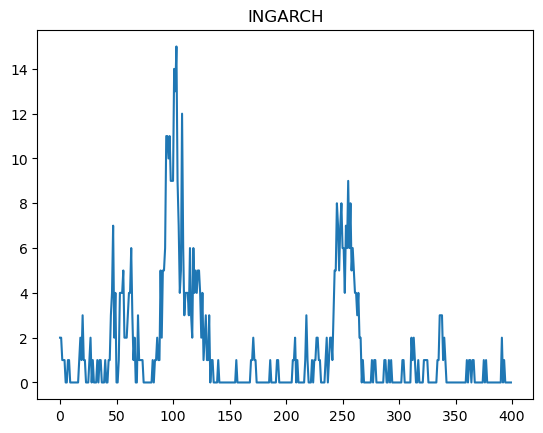

In [35]:
Gr(ING, 'INGARCH')

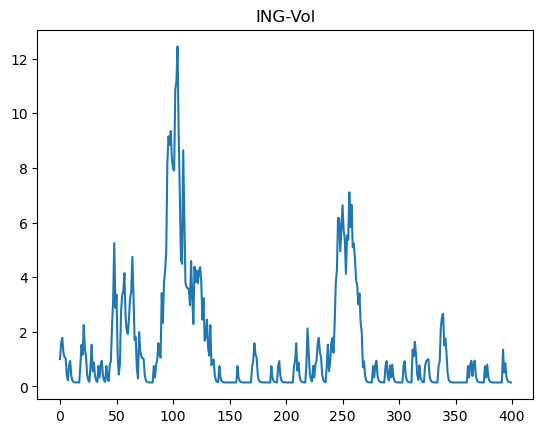

In [36]:
Gr(INGV, 'ING-Vol')